In [2]:
# ONLY the following libraries are allowed:
# matplotlib and numpy (imported by %pylab), pandas, scipy, and statsmodels.api.
################################################################################################################################
#  libraries allowed for the coursework
%pylab inline
import pandas as pd
from pandas import Series, DataFrame
from scipy import stats
import statsmodels.api as sm
################################################################################################################################

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


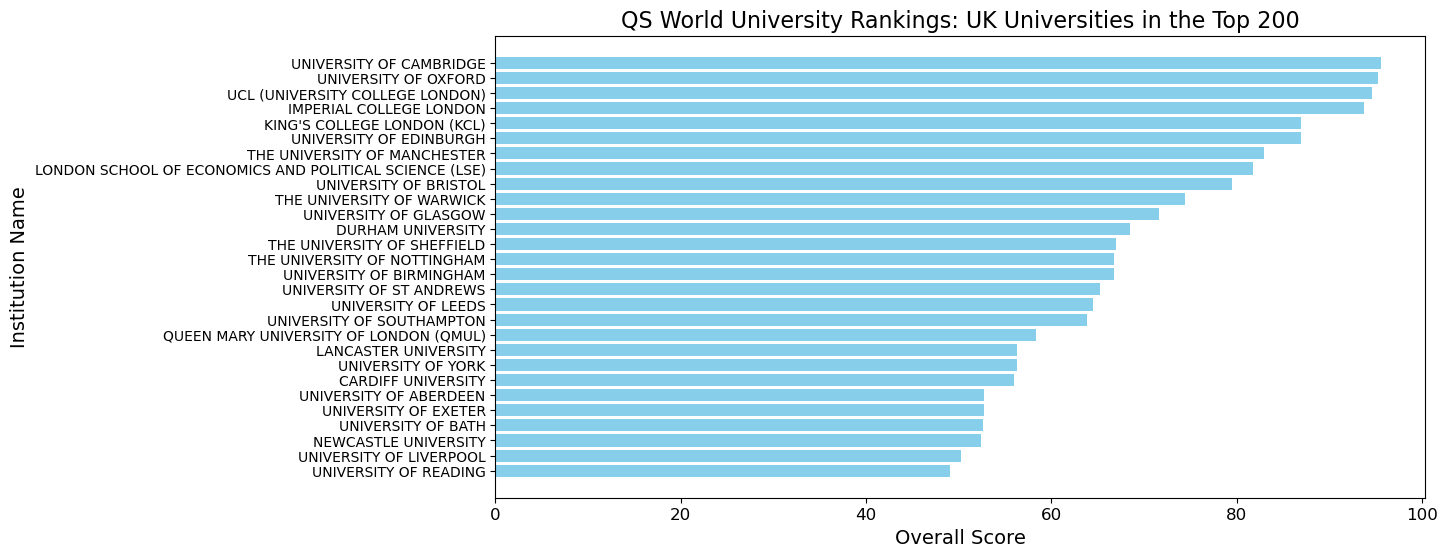

In [3]:
# CELL1 
import pandas as pd
import matplotlib.pyplot as plt

#Read the data
rankings = pd.read_excel('./2018-QS-World-University-Rankings-Top200.xlsx')


#Filter UK universities and sort by rank
uk_universities = rankings[rankings['Location'] == 'United Kingdom'].sort_values(by='Rank')

#Plot a horizontal bar graph for UK universities
plt.figure(figsize=(12, 6))
plt.barh(uk_universities['Institution Name'], uk_universities['Overall Score'], color='skyblue')  # Create the bar graph
plt.xlabel('Overall Score', fontsize=14)
plt.ylabel('Institution Name', fontsize=14)
plt.title('QS World University Rankings: UK Universities in the Top 200', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)

#Invert the y-axis so the highest-ranked university appears at the top
plt.gca().invert_yaxis()

#Show the plot
plt.show()


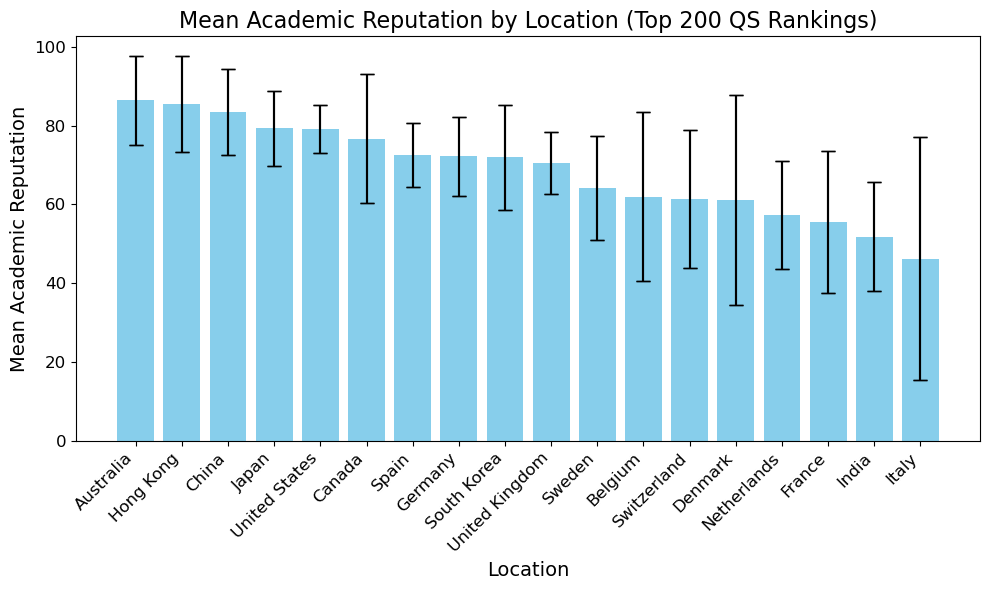

In [6]:
# CELL2
location_counts = rankings['Location'].value_counts()
valid_locations = location_counts[location_counts >= 3].index  # Only locations with 3 or more institutions

#Filter rankings to include only valid locations
filtered_rankings = rankings[rankings['Location'].isin(valid_locations)]

#Group by 'Location' and calculate the mean of 'Academic Reputation' for each location
location_mean = filtered_rankings.groupby('Location')['Academic Reputation'].mean()

#Calculate the 95% confidence interval for 'Academic Reputation' for each location
location_se = filtered_rankings.groupby('Location')['Academic Reputation'].sem()
confidence_interval = location_se * 1.96

#Sort the locations by mean academic reputation in descending order
location_mean_sorted = location_mean.sort_values(ascending=False)

#Plot the vertical bar graph with error bars
plt.figure(figsize=(10, 6))
plt.bar(location_mean_sorted.index, location_mean_sorted.values, yerr=confidence_interval[location_mean_sorted.index], 
        color='skyblue', capsize=5)
plt.xlabel('Location', fontsize=14)
plt.ylabel('Mean Academic Reputation', fontsize=14)
plt.title('Mean Academic Reputation by Location (Top 200 QS Rankings)', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)

#Add error bars
plt.errorbar(location_mean_sorted.index, location_mean_sorted.values, yerr=confidence_interval[location_mean_sorted.index],
             fmt='none', color='black', capsize=5)

#Show the plot
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()


In [8]:
# CELL3

from scipy.stats import ttest_ind

#Filter data for the countries of interest
countries = ['Australia', 'United States', 'France']
filtered_data = rankings[rankings['Location'].isin(countries)]

#Separate the data by country for "Academic Reputation"
australia_data = filtered_data[filtered_data['Location'] == 'Australia']['Academic Reputation'].dropna()
us_data = filtered_data[filtered_data['Location'] == 'United States']['Academic Reputation'].dropna()
france_data = filtered_data[filtered_data['Location'] == 'France']['Academic Reputation'].dropna()

#Case 1: Australia vs. United States
#Using t-test for all the three cases
t_stat1, p_val1 = ttest_ind(australia_data, us_data, equal_var=False)  
if p_val1 < 0.05:
    result1 = "statistically significant"
else:
    result1 = "not statistically significant"

print(f"Comparison 1 - Australia vs. United States: Using an independent t-test (Welch's test due to unequal variances), "
      f"we found that the difference in 'Academic Reputation' between Australia and the United States is {result1} "
      f"(t={t_stat1:.2f}, p={p_val1:.3f}).")

#Case 2: Australia vs. France
t_stat2, p_val2 = ttest_ind(australia_data, france_data, equal_var=False)  
if p_val2 < 0.05:
    result2 = "statistically significant"
else:
    result2 = "not statistically significant"

print(f"Comparison 2 - Australia vs. France: Using an independent t-test (Welch's test due to unequal variances), "
      f"the difference in 'Academic Reputation' between Australia and France is {result2} "
      f"(t={t_stat2:.2f}, p={p_val2:.3f}).")

#Case 3: United States vs. France
t_stat3, p_val3 = ttest_ind(us_data, france_data, equal_var=False) 
if p_val3 < 0.05:
    result3 = "statistically significant"
else:
    result3 = "not statistically significant"

print(f"Comparison 3 - United States vs. France: Using an independent t-test (Welch's test due to unequal variances), "
      f"we determined that the difference in 'Academic Reputation' between the United States and France is {result3} "
      f"(t={t_stat3:.2f}, p={p_val3:.3f}).")

Comparison 1 - Australia vs. United States: Using an independent t-test (Welch's test due to unequal variances), we found that the difference in 'Academic Reputation' between Australia and the United States is not statistically significant (t=1.11, p=0.286).
Comparison 2 - Australia vs. France: Using an independent t-test (Welch's test due to unequal variances), the difference in 'Academic Reputation' between Australia and France is statistically significant (t=2.84, p=0.024).
Comparison 3 - United States vs. France: Using an independent t-test (Welch's test due to unequal variances), we determined that the difference in 'Academic Reputation' between the United States and France is not statistically significant (t=2.43, p=0.060).


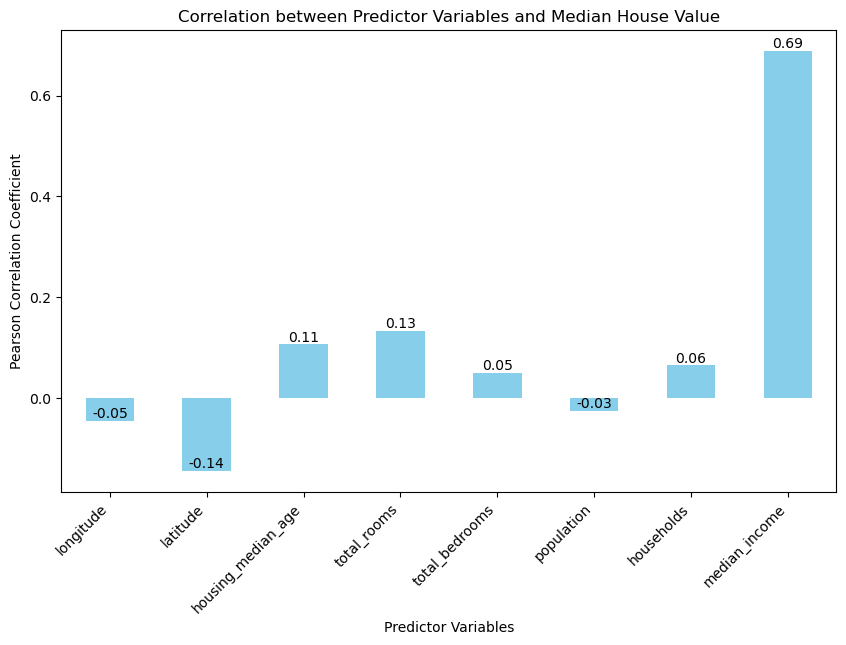

The correlation coefficients indicate the strength of the relationship between each predictor variable and the target. The closer the coefficient is to 1 or -1, the stronger the relationship.


In [10]:
# Importing the California Housing Prices (CHP) dataset into the cell
df = pd.read_csv('California Housing Prices (CHP) dataset.csv')
df

# Preprocessing the data by dropping the rows that contain missing values in the CHP dataset
df_missing = df.dropna()

# Analyzing the linear correlation between each of the predictor variables and the target variable
# Calculating the Pearson linear correlation coefficient:
corr_df = df_missing.corr()
target_corr = corr_df['median_house_value'].drop('median_house_value')  # Using 'median_house_value' as the target column

# Bar graph:
# X-axis represents the 8 predictor variables 
# Y-axis represents the Pearson linear correlation coefficient between each predictor variable and the target variable
plt.figure(figsize=(10, 6))
ax = target_corr.plot(kind='bar', color='skyblue')  # Vertical bar graph
plt.title('Correlation between Predictor Variables and Median House Value')
plt.xlabel('Predictor Variables')
plt.ylabel('Pearson Correlation Coefficient')

# Rotate the x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Adding the correlation values next to the bars
for index, value in enumerate(target_corr):
    ax.text(index, value, f'{value:.2f}', va='bottom', ha='center', fontsize=10)

plt.show()

# Print summary interpretation
print("The correlation coefficients indicate the strength of the relationship between each predictor variable and the target. The closer the coefficient is to 1 or -1, the stronger the relationship.")


MI: median_income
HA: housing_median_age
TR: total_rooms
LA: latitude
LO: longitude

Printing the two required linear equations Model A and Model B
Model A: MHV = 149924.19 + 42101.61*MI + 1969.37*HA + 3.72*TR + -4833.61*LA
Model B: MHV = -3763809.28 + 37321.80*MI + 1159.75*HA + 3.32*TR + -43925.26*LA + -44738.59*LO


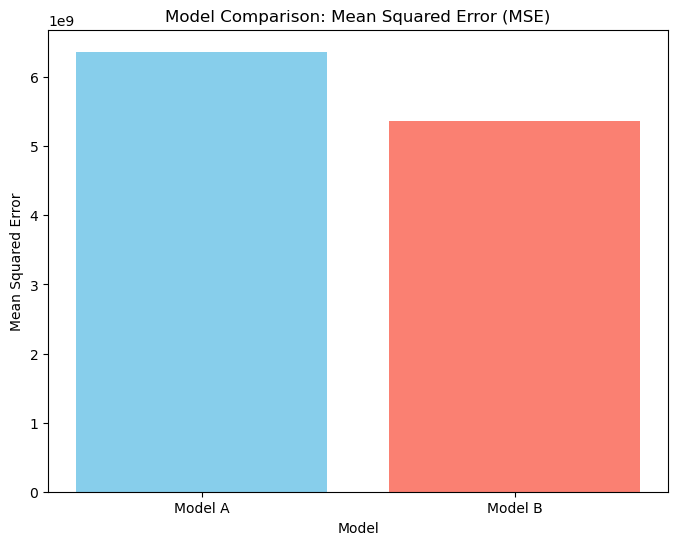

In [16]:
# CELL5
#Importing modules for calculating the Linear Regression and Mean Squared Error
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error

# Defining the predictors for Model A and Model B based on the column names provided
predictors_A = ['median_income', 'housing_median_age', 'total_rooms', 'latitude']  # Model A
predictors_B = ['median_income', 'housing_median_age', 'total_rooms', 'latitude', 'longitude']  # Model B
target = 'median_house_value'

#Defining the Predictor Variables as given in the dataset for Model A and Model B
print("MI: median_income")
print("HA: housing_median_age")
print("TR: total_rooms")
print("LA: latitude")
print("LO: longitude")

y = df_missing['median_house_value']

# Model A: Using predictors MI, HA, TR, LA
X_A = df_missing[['median_income', 'housing_median_age', 'total_rooms', 'latitude']]
model_A = LinearRegression()
model_A.fit(X_A, y)
y_pred_A = model_A.predict(X_A)
mse_A = mean_squared_error(y, y_pred_A)  # MSE for Model A

# Model B: Using predictors MI, HA, TR, LA, LO
X_B = df_missing[['median_income', 'housing_median_age', 'total_rooms', 'latitude', 'longitude']]
model_B = LinearRegression()
model_B.fit(X_B, y)
y_pred_B = model_B.predict(X_B)
mse_B = mean_squared_error(y, y_pred_B)  # MSE for Model B

# Print the two linear equations for Model A and Model B
print("\nPrinting the two required linear equations Model A and Model B")
print(f"Model A: MHV = {model_A.intercept_:.2f} + {model_A.coef_[0]:.2f}*MI + {model_A.coef_[1]:.2f}*HA + {model_A.coef_[2]:.2f}*TR + {model_A.coef_[3]:.2f}*LA")
print(f"Model B: MHV = {model_B.intercept_:.2f} + {model_B.coef_[0]:.2f}*MI + {model_B.coef_[1]:.2f}*HA + {model_B.coef_[2]:.2f}*TR + {model_B.coef_[3]:.2f}*LA + {model_B.coef_[4]:.2f}*LO")

# Visualizing Model Comparison
models = ['Model A', 'Model B']
mse_values = [mse_A, mse_B]

plt.figure(figsize=(8, 6))
plt.bar(models, mse_values, color=['skyblue', 'salmon'])
plt.title('Model Comparison: Mean Squared Error (MSE)')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.show()


In [18]:
# CELL6

print("From the Dataset: California Housing Prices (CHP) dataset.csv and the requirements in CELL 5 state to Develop a Linear Regression Model and uses two Models with its predictor variables. \n Model A with predictor variables: MI, HA, TR, LA and \n Model B with predictor variables: MI, HA, TR, LA, LO.\n With these predictor Variables, I conducted experiments to find the Linear Regression between both the models using the Mean Squared Error (MSE) which produces the average suqares of the errors- for measuring the performance of a regression model, i.e., measures the error of prediction between the between the true and predicted 'Median House Value (MHV)'. The model with the lower MSE is considered more accurate and reliable.")
#According to the calculations done to build the graph for Model A and Model B: determining which is more accurate and reliable
# Output MSE for comparison
print(f"Model A MSE: {mse_A}")
print(f"Model B MSE: {mse_B}")

# Determine which model is more accurate
if mse_A < mse_B:
    print("Model A is more accurate and reliable.")
else:
    print("Model B is more accurate and reliable.")

# Summary
print("\nSummary: Based on the experiments conducted using the California Housing Prices (CHP) dataset, Model A, which uses predictors MI (median income), HA (housing median age), TR (total rooms), and LA (latitude), was compared with Model B, which includes the additional predictor LO (longitude). Both models were evaluated using the Mean Squared Error (MSE), which quantifies the error between the true and predicted Median House Value (MHV). The model with the lower MSE value is considered the more accurate and reliable model. According to the results, Model A (with fewer predictors) may perform just as well or better than Model B (with an additional predictor LO), depending on the MSE values. This suggests that adding more predictors does not necessarily improve the model's accuracy, and simplicity may lead to a more reliable model.")

# Limitations
print("\nLimitations: While Model B performed better, there are some things to keep in mind. The results depend on the specific factors we used to build the models, so if we had used different factors or changed the data in some way, the results might be different. Also, the models assume that the relationship between the factors and house prices is a straight line, but in real life, things might not always work that way. The MSE is helpful but doesn’t always show how well the model works, especially if there are unusual values (called outliers) in the data. Finally, it’s important to test the model with new data to see if it works well in different situations, and we would need to do that through additional testing methods.")   

From the Dataset: California Housing Prices (CHP) dataset.csv and the requirements in CELL 5 state to Develop a Linear Regression Model and uses two Models with its predictor variables. 
 Model A with predictor variables: MI, HA, TR, LA and 
 Model B with predictor variables: MI, HA, TR, LA, LO.
 With these predictor Variables, I conducted experiments to find the Linear Regression between both the models using the Mean Squared Error (MSE) which produces the average suqares of the errors- for measuring the performance of a regression model, i.e., measures the error of prediction between the between the true and predicted 'Median House Value (MHV)'. The model with the lower MSE is considered more accurate and reliable.
Model A MSE: 6368999194.992284
Model B MSE: 5364858329.063703
Model B is more accurate and reliable.

Summary: Based on the experiments conducted using the California Housing Prices (CHP) dataset, Model A, which uses predictors MI (median income), HA (housing median age), 

In [20]:
import scipy
print(scipy.__version__)

1.13.1
